<a href="https://colab.research.google.com/github/Diggi14/project_Property/blob/main/6_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [575]:
!git clone https://github.com/Diggi14/property.git

fatal: destination path 'property' already exists and is not an empty directory.


In [644]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [645]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df=pd.read_csv('/content/property/gurgaon1.csv')

<Axes: xlabel='price'>

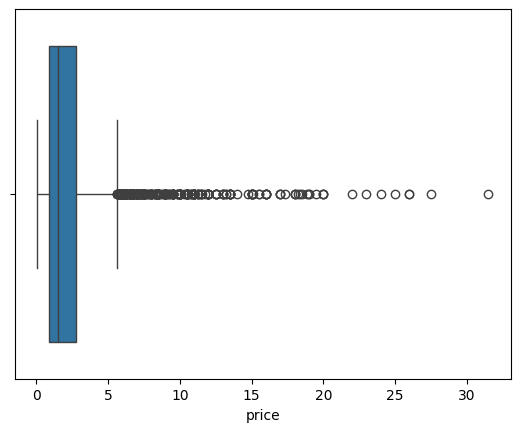

In [646]:
sns.boxplot(x=df['price'])

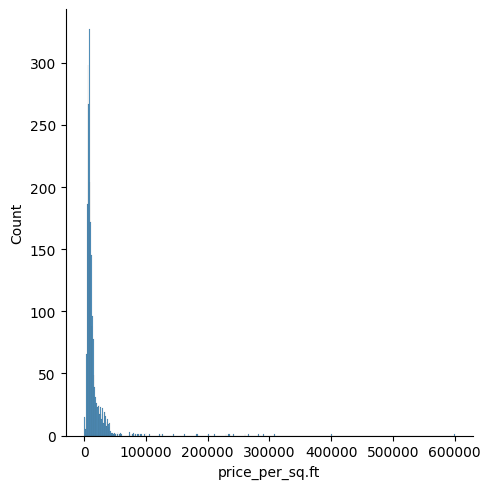

In [647]:
sns.displot(x=df['price_per_sq.ft'])

In [648]:
df['price_per_sq.ft'].describe()

,price_per_sq.ft
count,2494.000000
mean,14569.225341
std,24964.841707
min,4.000000
25%,6736.000000
50%,9127.500000
75%,14244.250000
max,600000.000000


In [649]:
carpet_na=df[(df['Super_build_area'].notna()) & (df['Carpet_area']).isna()].index

In [650]:
df.loc[carpet_na,'Carpet_area']=df.loc[carpet_na,'Super_build_area']*0.70

In [651]:
carp_na=df[(df['build_area'].notna()) & (df['Super_build_area'].isna()) & (df['Carpet_area']).isna()].index

In [652]:
df.loc[carp_na,'Carpet_area']=df.loc[carp_na,'build_area']*0.80

In [653]:
df[df['Carpet_area'].isna()]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score


In [654]:
df.drop(['build_area'],axis=1,inplace=True)

In [655]:
df.isna().sum()

,0
society,0
price,0
price_per_sq.ft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,15
facing,840
type,0
sector,0


In [656]:
df.head(1)

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
0,maa bhagwati residency,0.45,5000,2,2,1,4.0,West,flat,sector 7,NaN,900.0,1,0,0,0,0,relatively new,15,1,27


In [657]:
Q1=df['price_per_sq.ft'].quantile(0.25)
Q3=df['price_per_sq.ft'].quantile(0.75)
lower_bound=Q1-1.5*(Q3-Q1)
upper_bound=Q3+1.5*(Q3-Q1)
outlier_sqft=df[(df['price_per_sq.ft']<lower_bound) |(df['price_per_sq.ft']>upper_bound)]
outlier_sqft['price_per_sq.ft'].describe()

,price_per_sq.ft
count,273.000000
mean,53266.351648
std,62036.908363
min,25556.000000
25%,29638.000000
50%,34722.000000
75%,41818.000000
max,600000.000000


In [658]:
outlier_sqft[['Carpet_area','price','price_per_sq.ft']].sort_values(by='price_per_sq.ft',ascending=False)

,Carpet_area,price,price_per_sq.ft
2227,320.000,24.00,600000
2258,200.000,10.00,400000
2193,48.000,1.85,308333
2445,185.600,6.75,290948
2405,192.000,7.10,283333
2458,240.000,8.00,266666
2268,321.600,10.50,261194
2237,48.000,1.45,241666
2305,287.200,8.45,235376
2428,128.000,3.75,234375


In [659]:
outlier_sqft.loc[:,'Carpet_area']=outlier_sqft['Carpet_area'].apply(lambda x:x*9 if x<100 else x)

In [660]:
outlier_sqft.loc[:,'Super_build_area']=outlier_sqft['Carpet_area']*1.43

In [661]:
outlier_sqft.loc[:,'price_per_sq.ft']=round(outlier_sqft['price']*10000000/outlier_sqft['Super_build_area'])

In [662]:
outlier_sqft['price_per_sq.ft'].describe()

,price_per_sq.ft
count,273.000000
mean,55187.168498
std,75642.159207
min,3238.000000
25%,24281.000000
50%,29138.000000
75%,36115.000000
max,524476.000000


In [663]:
outlier_sqft[['Carpet_area','price','price_per_sq.ft']].sort_values(by='price_per_sq.ft',ascending=False)

,Carpet_area,price,price_per_sq.ft
2227,320.000,24.00,524476
1866,400.000,20.00,349650
2258,200.000,10.00,349650
2338,153.600,6.95,316415
1883,172.000,7.60,308993
2223,401.600,17.30,301243
1914,213.600,8.80,288101
2477,150.000,6.09,283916
2387,400.000,16.00,279720
2312,400.000,16.00,279720


In [664]:
df.update(outlier_sqft)

/tmp/ipython-input-3266164101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Carpet_area'])


<Axes: ylabel='Density'>

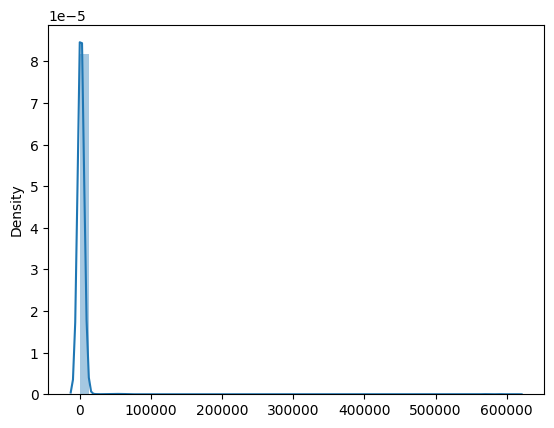

In [665]:
sns.distplot(x=df['Carpet_area'])

<Axes: xlabel='Carpet_area'>

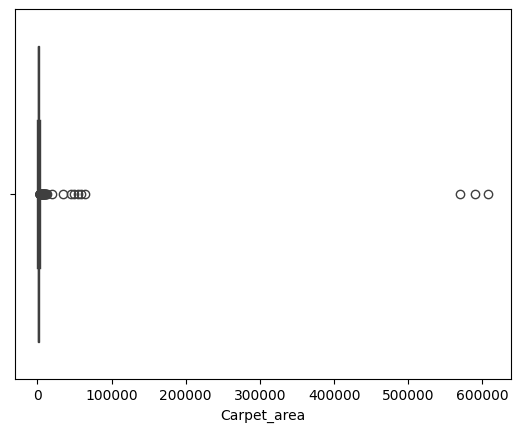

In [666]:
sns.boxplot(x=df['Carpet_area'])

In [667]:
df['Carpet_area'].describe()

,Carpet_area
count,2494.000000
mean,2320.345984
std,20550.471806
min,11.200000
25%,888.300000
50%,1290.000000
75%,1809.500000
max,607936.000000


In [668]:
df[df['Carpet_area']>50000]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
58,Pyramid Elite,0.46,79,2,2,1,0.0,NaN,flat,sector 86,NaN,58141.0,1,0,0,0,0,Under Construction,11,1,41
80,Signature The Roselia,0.45,7,2,2,2,2.0,South-West,flat,sector 95a,NaN,569243.0,1,0,0,0,0,New Property,64,1,21
794,Ramsons Kshitij,0.31,5,2,2,1,1.0,North-East,flat,sector 95,NaN,607936.0,0,1,0,0,1,relatively new,40,1,5
795,ROF Ananda,0.33,60,2,2,1,13.0,South-West,flat,sector 95,NaN,54917.0,1,0,0,0,0,relatively new,24,1,24
796,ROF Ananda,0.38,58,3,2,1,12.0,North,flat,sector 95,NaN,64412.0,1,0,0,0,0,relatively new,34,1,24
1491,HCBS Sports Ville,0.35,4,2,2,2,8.0,NaN,flat,sohna,NaN,589717.6,1,0,0,0,0,relatively new,27,0,0


In [669]:
df=df[df['Carpet_area']<50000]

/tmp/ipython-input-3266164101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Carpet_area'])


<Axes: ylabel='Density'>

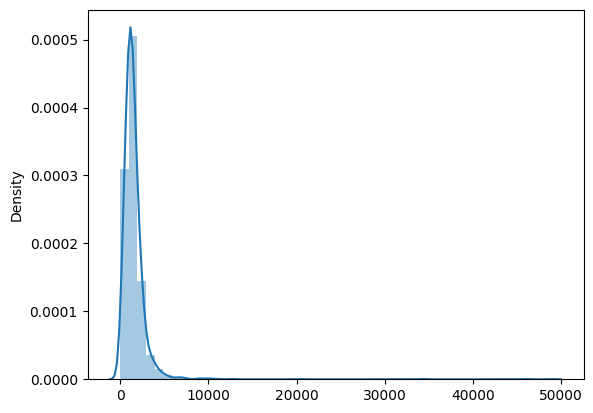

In [670]:
sns.distplot(x=df['Carpet_area'])

<Axes: xlabel='Carpet_area'>

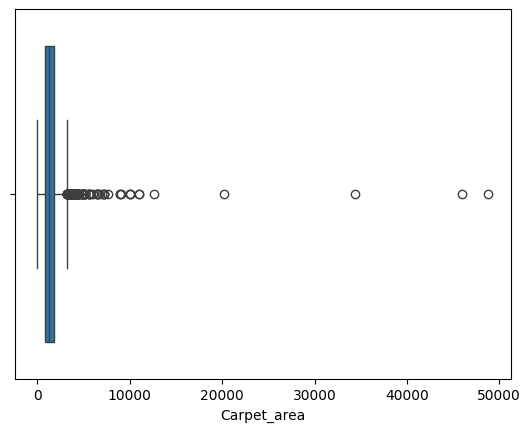

In [671]:
sns.boxplot(x=df['Carpet_area'])

In [672]:
df[df['Carpet_area']>10000].sort_values(by='Carpet_area',ascending=False)

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
839,Signature The Serenas,0.28,57,1,1,2,1.0,North-West,flat,sohna,NaN,48811.000,0,1,0,0,0,relatively new,23,1,34
792,Ramsons Kshitij,0.24,53,2,2,1,10.0,North-West,flat,sector 95,NaN,45966.000,0,0,0,0,1,relatively new,20,1,0
797,ROF Ananda,0.21,61,1,1,1,13.0,North,flat,sector 95,NaN,34401.000,1,0,0,0,0,relatively new,56,1,24
2297,independent,5.50,2716,8,7,3+,3.0,East,house,sector 43,NaN,20250.000,0,1,1,1,1,old property,96,2,42
1765,Godrej Icon,1.75,1384,3,3,3+,6.0,NaN,flat,sector 88a,NaN,12646.525,1,0,0,0,0,New Property,0,1,36
961,M3M Golfestate,13.20,12000,4,4,3,13.0,North,flat,sector 65,NaN,11000.000,0,0,1,0,0,old property,61,1,51
2318,independent,18.40,1859,6,8,3+,4.0,South,house,sector 26,NaN,11000.000,0,0,1,1,0,relatively new,45,2,45


In [673]:
df[df['Carpet_area']<1000]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
0,maa bhagwati residency,0.45,5000,2,2,1,4.0,West,flat,sector 7,NaN,900.0000,1,0,0,0,0,relatively new,15,1,27
1,Apna Enclave,0.50,7692,2,2,1,1.0,West,flat,sector 3,NaN,650.0000,1,0,0,0,0,NaN,21,2,34
2,Tulsiani Easy in Homes,0.40,6722,2,2,3,12.0,NaN,flat,sohna,NaN,595.0000,1,0,0,0,0,New Property,41,1,25
4,Parkwood Westend,0.70,5204,2,2,3,5.0,NaN,flat,sector 92,1345.00000,941.5000,0,1,0,0,0,Under Construction,0,1,5
9,HCBS Sports Ville,0.29,5587,2,2,1,4.0,NaN,flat,sohna,NaN,519.0000,1,0,0,0,0,relatively new,27,1,0
11,Shree Vardhman Flora,0.70,5384,2,2,3,13.0,NaN,flat,sector 90,1300.00000,910.0000,0,1,0,0,0,New Property,11,1,49
16,Smart World Gems,0.86,7796,2,3,3,4.0,NaN,flat,sector 89,1103.00000,772.1000,1,0,0,0,0,relatively new,0,1,52
21,Apex builders,0.42,5600,2,2,2,4.0,North,flat,sector 37c,NaN,750.0000,1,0,0,0,0,relatively new,24,1,21
22,Ompee K S Residency,1.60,18836,2,2,2,1.0,NaN,flat,sector 110,849.42000,594.0000,1,0,0,0,0,relatively new,0,1,53
28,Pooja Apartment,0.25,3571,2,2,2,2.0,East,flat,sector 5,NaN,700.0000,1,0,0,0,0,relatively new,0,1,43


In [674]:
df.drop(index=[839,792,797],inplace=True)

In [675]:
df[df['Carpet_area']>10000].sort_values(by='Carpet_area',ascending=False)

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
2297,independent,5.50,2716,8,7,3+,3.0,East,house,sector 43,NaN,20250.000,0,1,1,1,1,old property,96,2,42
1765,Godrej Icon,1.75,1384,3,3,3+,6.0,NaN,flat,sector 88a,NaN,12646.525,1,0,0,0,0,New Property,0,1,36
961,M3M Golfestate,13.20,12000,4,4,3,13.0,North,flat,sector 65,NaN,11000.000,0,0,1,0,0,old property,61,1,51
2318,independent,18.40,1859,6,8,3+,4.0,South,house,sector 26,NaN,11000.000,0,0,1,1,0,relatively new,45,2,45


In [676]:
ind=df[df['Carpet_area']>10000].index
df.loc[ind,'Carpet_area']=df.loc[ind,'Carpet_area']/9

In [677]:
df.loc[[2297,1765,961,2318],:]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
2297,independent,5.50,2716,8,7,3+,3.0,East,house,sector 43,NaN,2250.000000,0,1,1,1,1,old property,96,2,42
1765,Godrej Icon,1.75,1384,3,3,3+,6.0,NaN,flat,sector 88a,NaN,1405.169444,1,0,0,0,0,New Property,0,1,36
961,M3M Golfestate,13.20,12000,4,4,3,13.0,North,flat,sector 65,NaN,1222.222222,0,0,1,0,0,old property,61,1,51
2318,independent,18.40,1859,6,8,3+,4.0,South,house,sector 26,NaN,1222.222222,0,0,1,1,0,relatively new,45,2,45


In [678]:
df.loc[[2297, 1765, 961, 2318], 'Super_build_area'] = (
    df.loc[[2297, 1765, 961, 2318], 'Carpet_area'] * 1.43)


/tmp/ipython-input-3266164101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Carpet_area'])


<Axes: ylabel='Density'>

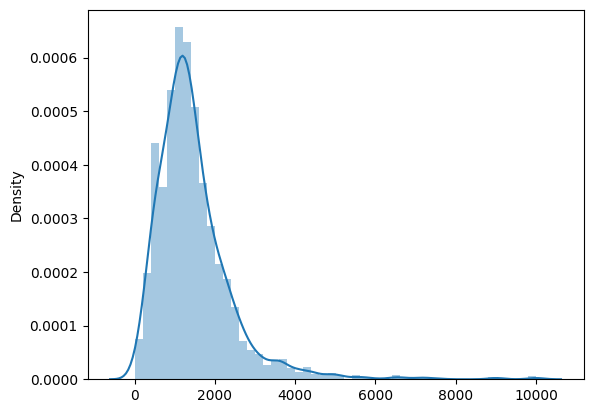

In [679]:
sns.distplot(x=df['Carpet_area'])

In [680]:
df[df['Carpet_area']>8000].sort_values(by='Carpet_area',ascending=False)

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
956,The Penthouses at the Hibiscus,8.50,8500,4,4,3,9.0,South-East,flat,sector 50,NaN,10000.0,0,0,1,0,0,old property,42,1,59
2033,independent,8.00,8000,3,9,2,3.0,NaN,house,sector 25,NaN,10000.0,1,0,0,0,0,New Property,0,1,0
2419,independent,18.25,18250,7,9,3+,4.0,East,house,sector 26,NaN,10000.0,0,1,1,1,0,relatively new,52,2,45
2261,independent,27.50,24366,6,7,3+,3.0,North-East,house,sector 43,NaN,9028.8,0,1,1,1,1,relatively new,32,2,42
958,The Penthouses at the Hibiscus,8.00,8888,4,3,3,7.0,South-East,flat,sector 50,NaN,9000.0,0,0,1,0,0,old property,42,1,59
2454,independent,10.00,7770,5,5,3+,3.0,East,house,sector 25,12870.0,9000.0,0,0,1,1,0,old property,22,0,45


<Axes: xlabel='Carpet_area'>

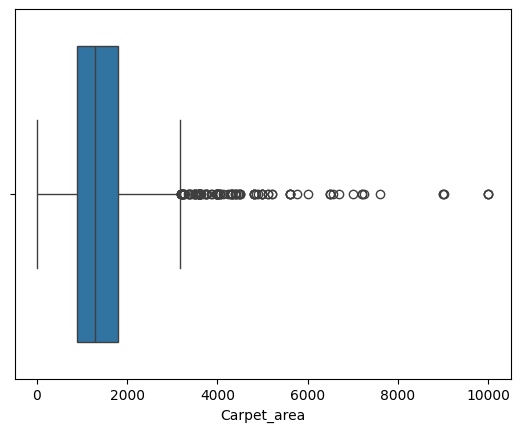

In [681]:
sns.boxplot(x=df['Carpet_area'])

In [682]:
df['Carpet_area'].describe()

,Carpet_area
count,2485.000000
mean,1474.688681
std,994.240942
min,11.200000
25%,884.800000
50%,1279.600000
75%,1800.000000
max,10000.000000


In [683]:
df['Super_build_area'].isna().sum()

np.int64(1078)

In [684]:
df.loc[:, 'Super_build_area'] = df.loc[:, 'Carpet_area'] * 1.43

/tmp/ipython-input-3997226259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['bedRoom'])


<Axes: ylabel='Density'>

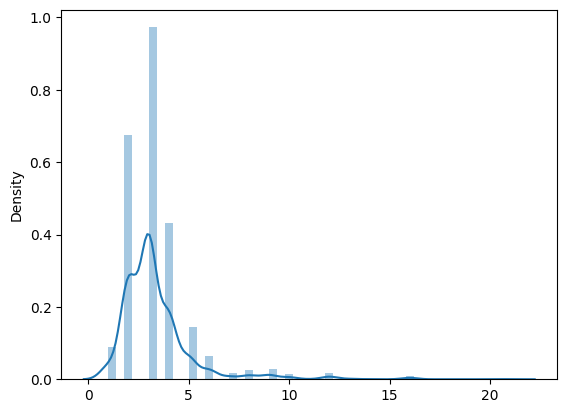

In [685]:
sns.distplot(x=df['bedRoom'])

In [686]:
df['Super_build_area'].isna().sum()

np.int64(0)

In [687]:
df['bedRoom'].describe()

,bedRoom
count,2485.000000
mean,3.372636
std,1.944162
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [688]:
df[df['bedRoom']>10].sort_values(by='bedRoom',ascending=False)

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
1862,independent,5.00,37645,21,21,3+,5.0,North,house,sector 54,1328.184,928.8,0,0,1,0,0,relatively new,35,0,42
1864,independent,4.50,34146,20,20,3+,4.0,East,house,sector 43,1317.888,921.6,0,0,1,0,0,relatively new,15,0,42
2385,independent,5.50,33387,18,18,3+,4.0,South-West,house,sector 54,1647.360,1152.0,0,0,1,0,0,relatively new,57,0,50
1866,Luxury DLF City Floors,20.00,349650,16,16,3+,4.0,NaN,house,sector 26,572.000,400.0,0,0,1,0,0,New Property,25,2,45
2400,independent,12.00,34079,16,16,3+,4.0,NaN,house,sector 40,3521.232,2462.4,0,1,1,1,0,New Property,0,2,39
1896,independent,13.50,43706,16,16,3+,4.0,North-West,house,sector 43,3088.800,2160.0,0,1,1,1,1,relatively new,30,1,42
2220,DLF City Plots,20.00,38695,16,20,3+,4.0,North-East,house,sector 26,5168.592,3614.4,0,1,1,1,0,New Property,118,2,44
1943,independent,4.50,25000,16,16,3+,4.0,South,house,sector 11,2059.200,1440.0,1,0,0,0,0,relatively new,13,2,32
2256,independent,26.00,57720,16,16,3+,4.0,North-West,house,sector 26,4504.500,3150.0,0,1,1,1,0,New Property,48,2,45
2407,independent,16.00,41440,16,16,3+,4.0,West,house,sector 25,3861.000,2700.0,0,1,1,1,0,New Property,47,2,45


<Axes: xlabel='price_per_sq.ft'>

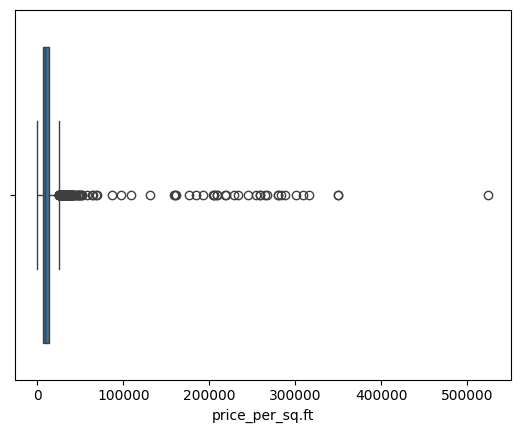

In [689]:
sns.boxplot(x=df['price_per_sq.ft'])

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 0 to 2493
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   society           2485 non-null   object 
 1   price             2485 non-null   float64
 2   price_per_sq.ft   2485 non-null   int64  
 3   bedRoom           2485 non-null   int64  
 4   bathroom          2485 non-null   int64  
 5   balcony           2485 non-null   object 
 6   floorNum          2470 non-null   float64
 7   facing            1647 non-null   object 
 8   type              2485 non-null   object 
 9   sector            2485 non-null   object 
 10  Super_build_area  2485 non-null   float64
 11  Carpet_area       2485 non-null   float64
 12  Not available     2485 non-null   int64  
 13  Study Room        2485 non-null   int64  
 14  Servant Room      2485 non-null   int64  
 15  Pooja Room        2485 non-null   int64  
 16  Others            2485 non-null   int64  
 17  

In [691]:
df['area_ratio']=df['Carpet_area']/df['bedRoom']

In [694]:
x=df[df['price_per_sq.ft']<18000]
(x['Carpet_area']/x['bedRoom']).quantile(0.05)

np.float64(202.1259259259259)

In [695]:
df[df['area_ratio']<202]['bedRoom'].value_counts()

,count
bedRoom,
4,37
5,35
3,30
2,28
6,21
12,16
9,13
8,12
7,10


In [697]:
df=df[df['area_ratio']>100]

In [698]:
outliers_df=df[(df['area_ratio']<250) & (df['bedRoom']>3)]

In [628]:
outliers_df

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
1874,independent,2.00,14914,6,4,3,3.0,East,house,sector 2,1534.104000,1072.800000,0,1,0,1,0,relatively new,22,2,53,178.800000
1876,independent,2.10,23333,7,7,3+,3.0,North-East,house,sector 38,1029.600000,720.000000,0,1,0,1,0,relatively new,21,1,46,102.857143
1879,independent,3.40,12938,9,9,3,3.0,West,house,sector 9,3006.432000,2102.400000,1,0,0,0,0,old property,39,2,31,233.600000
1889,independent,10.00,97125,4,4,3+,1.0,North-East,house,manesar,1029.600000,720.000000,0,0,1,0,0,NaN,10,1,0,180.000000
1892,FLOOR WISE DESIGNER KOTHI,13.00,42088,12,16,3+,4.0,North-East,house,sector 25,3088.800000,2160.000000,0,1,1,1,0,New Property,97,2,45,180.000000
1896,independent,13.50,43706,16,16,3+,4.0,North-West,house,sector 43,3088.800000,2160.000000,0,1,1,1,1,relatively new,30,1,42,135.000000
1902,Uppal Southend,3.75,22345,6,6,3,3.0,East,house,sector 49,1678.248000,1173.600000,0,0,0,0,1,old property,32,1,40,195.600000
1910,independent,9.50,35083,12,12,3+,4.0,NaN,house,sector 40,2707.848000,1893.600000,0,0,0,0,0,New Property,35,2,39,157.800000
1933,independent,6.60,32051,6,7,3+,2.0,East,house,sector 25,2059.200000,1440.000000,0,1,1,0,0,old property,83,2,45,240.000000
1945,independent,2.50,22693,7,7,3,4.0,West,house,sector 43,1101.672000,770.400000,0,0,0,0,1,relatively new,10,2,42,110.057143


In [699]:
outliers_df.loc[:,'bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

/tmp/ipython-input-1618625379.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.  2.  3.  4.  3.  4.  2.  3.  3.  2.  4.  2.  2.  8.  5.  2.  8.  3.
 10.  5.  2.  2.  4.  3.  2.  3. nan  1.  2.  4.  5.  1.  2.  1.  2.  2.
  2.  6.  1.  3.  4.  3.  2.  2.  3.  2.  1.  2.  2.  9.  2.  5.  5.  2.
 10.  2.  1.  5.  2.  1.  2.  3.  2.  4.  4.  3.  2.  4. nan  1.  3.  3.
  2.  1.  4.  2.  3.  2.  3.  2.  2.  3.  2.  3.  2.  2.  1.  3.  3.  2.
  3.  4.  3.  4.  3.  2.  4.  4.  2.  2.  3.  2.  2.  2.  1.  3.  2.  4.
  4.  4.  2.  1.  2.  3.  3.  2.  2.  2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  outliers_df.loc[:,'bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [700]:
df.update(outliers_df)

In [701]:
df[(df['area_ratio']<250) & (df['bedRoom']>4)]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
1967,independent,1.10,6172,8,8,0,1.0,NaN,house,manesar,2038.608,1425.6,1,0,0,0,0,New Property,0,1,14,178.2
1970,independent,0.95,7308,5,3,0,1.0,NaN,house,sector 24,1487.200,1040.0,1,0,0,0,0,NaN,0,1,0,208.0
1972,independent,0.80,6666,8,8,2,1.0,NaN,house,manesar,1372.800,960.0,1,0,0,0,0,relatively new,0,1,14,120.0
1974,shivpuri,2.80,12444,10,7,3,1.0,NaN,house,sector 7,2574.000,1800.0,0,1,1,1,1,NaN,0,2,27,180.0
1977,independent,1.16,11717,5,4,2,1.0,North-East,house,sector 7,1415.700,990.0,1,0,0,0,0,NaN,0,1,0,198.0
2061,independent,1.10,10000,5,4,2,1.0,East,house,sector 5,1287.000,900.0,1,0,0,0,0,NaN,0,1,0,180.0
2094,independent,1.10,12222,6,4,1,1.0,South-West,house,sector 9,1287.000,900.0,1,0,0,0,0,NaN,0,1,0,150.0
2155,independent,0.98,9074,9,4,3,1.0,South,house,sector 2,1544.400,1080.0,1,0,0,0,0,NaN,0,1,0,120.0
2164,independent,0.85,9444,5,3,3,1.0,NaN,house,sector 5,1287.000,900.0,1,0,0,0,0,NaN,0,1,0,180.0
2167,shivpuri,2.40,8889,5,5,3,2.0,North,house,sector 7,3088.800,2160.0,0,1,1,1,0,NaN,8,1,27,216.0


In [702]:
df=df[~((df['area_ratio']<250) & (df['bedRoom']>4))]

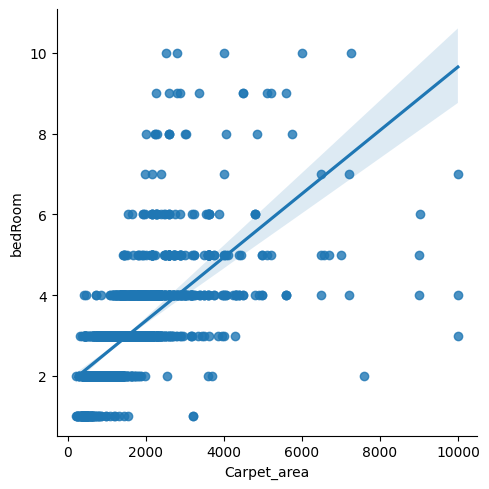

In [703]:
sns.lmplot(data=df,x='Carpet_area',y='bedRoom')

In [707]:
df[df['bedRoom']>=10]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
1888,independent,9.00,24904,10,10,3,3.0,East,house,sector 25,3613.896,2527.2,0,0,0,1,0,NaN,42,2,45,252.72
2031,independent,1.35,3857,10,6,3+,3.0,NaN,house,sector 11,4004.000,2800.0,1,0,0,0,0,NaN,0,1,0,280.00
2133,DLF City Plot Phase 4,13.00,1992,10,10,3+,1.0,NaN,house,sector 28,10367.500,7250.0,1,0,0,0,0,NaN,0,1,37,725.00
2372,Unitech Palms South City 1,9.35,10897,10,10,3+,4.0,North-East,house,sector 41,8580.000,6000.0,0,1,1,0,0,old property,63,2,47,600.00
2424,DLF Pink Town House,1.90,3786,10,9,3+,3.0,North,house,sector 24,5740.592,4014.4,0,0,0,0,1,relatively new,21,0,37,401.44


In [713]:
df['bathroom'].value_counts()

,count
bathroom,
2,736
3,673
4,470
5,180
1,105
6,58
7,16
9,13
8,11


In [714]:
df[df['bathroom']>10]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
2183,independent,11.00,25264,8,11,3+,3.0,East,house,sector 24,4354.064,3044.8,0,1,1,1,1,NaN,30,2,0,380.6
2184,Adani Brahma Samsara,18.02,24651,9,12,3+,3.0,North-East,house,sector 60,7310.160,5112.0,0,0,1,0,0,relatively new,108,2,52,568.0


In [710]:
df.drop(index=df[df['bedRoom']*1.8<df['bathroom']].index,inplace=True)

In [712]:
df[df['bathroom']>7]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
1875,DLF City Plots Phase 2,10.75,26102,9,9,3+,3.0,South-West,house,sector 25,4118.400,2880.0,0,0,1,1,0,NaN,43,1,45,320.000000
1888,independent,9.00,24904,10,10,3,3.0,East,house,sector 25,3613.896,2527.2,0,0,0,1,0,NaN,42,2,45,252.720000
1901,independent,17.00,33023,5,8,3+,3.0,North-East,house,sector 45,5148.000,3600.0,0,1,1,1,0,relatively new,115,0,39,720.000000
2020,independent,14.00,34865,9,9,3+,4.0,North,house,sector 43,4015.440,2808.0,0,0,1,0,0,old property,3,1,42,312.000000
2051,independent,13.50,19286,9,9,0,1.0,East,house,sector 25,8008.000,5600.0,1,0,0,0,0,relatively new,0,1,0,622.222222
2124,independent,5.50,13095,9,9,3+,3.0,South,house,sector 23a,4804.800,3360.0,0,0,1,0,1,old property,0,2,61,373.333333
2133,DLF City Plot Phase 4,13.00,1992,10,10,3+,1.0,NaN,house,sector 28,10367.500,7250.0,1,0,0,0,0,NaN,0,1,37,725.000000
2166,independent,13.00,39957,6,8,3+,NaN,NaN,house,sector 25,3253.536,2275.2,0,1,1,1,0,relatively new,0,0,34,379.200000
2183,independent,11.00,25264,8,11,3+,3.0,East,house,sector 24,4354.064,3044.8,0,1,1,1,1,NaN,30,2,0,380.600000
2184,Adani Brahma Samsara,18.02,24651,9,12,3+,3.0,North-East,house,sector 60,7310.160,5112.0,0,0,1,0,0,relatively new,108,2,52,568.000000


In [715]:
df.to_csv('cleaned_gurgaon.csv')